<b> Final Project I590 Part II - Danny Rigdon, Harshal Pandit, Siddarth Gokhale </b>



In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import warnings
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from statistics import stdev  #Imported this function but ended up using .std instead

In [3]:
warnings.filterwarnings('ignore')

In [4]:
#load data file
bcw = pd.read_csv('Breast-Cancer-Wisconsin.csv')

In [5]:
#print some of the datafile out to ensure it loaded and see if it looks appropriate
bcw.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
#Replace ? by NaN in column A7. 
bcw['A7'] = bcw['A7'].replace('?', np.NaN)

In [7]:
#column A7 needs to be converted back to numeric. 
bcw['A7'] = pd.to_numeric(bcw['A7'], errors='coerce')

In [8]:
#Report how many NaN. Use isnull() function applied to the dataframe. 
bcw.isnull()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#Then you can use arithmetic sum(). 
#[Remember to use print() statement to report]
print(bcw['A7'].isnull().sum())

16


In [10]:
#Replace NaN values with the mean of column A7. Use fillna() - find how to calculate mean of the column, 
#add a parameter skipna=TRUE. Apply this function to the entire df - you do not need to specify here column A7

#add column wise fill na prior to applying the mean


#update to just include A2 - CLASS with square brackets*

bcw_clean = bcw[['Scn','A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']].mean(skipna=True)

In [11]:
bcw_clean = bcw[['Scn','A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']].fillna(bcw.mean(skipna=True, numeric_only=True))


In [12]:
#summary statistics 
bcw_clean[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']].describe()


,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [13]:
#Find number of columns and number of rows
#this is the shape of the original dataframe
bcw.shape

(699, 11)

In [14]:
#this is the shape once we limited the dataframe to A2 - CLASS
bcw_clean.shape

(699, 11)

In [15]:
#Report how many unique id values (column Scn) - hint the length of unique ids

len(bcw['Scn'].unique())


645

In [16]:
#ran the duplicated function to identify duplicate entries
bcw_clean.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
669    False
670    False
671    False
672    False
673    False
674    False
675    False
676    False
677    False
678    False
679    False
680    False
681    False
682    False
683    False
684     True
685    False
686    False
687    False
688    False
689    False
690    False
691    False
692    False
693    False
694    False
695    False
696    False
697    False
698    False
Length: 699, dtype: bool

In [17]:
#the drop_duplicates function keep the first entry of a sample and removes entries that are duplicates across the 
#entire row, i.e. they are duplicate entries across every column
bcw_clean = bcw_clean.drop_duplicates()

In [18]:
#this is to validate that the data was changed in reference to the prior len(bcw)
len(bcw_clean)
#8 records were removed because they were duplicates across every column in the dataframe
#there are other non-unique Scns that have multiple measurements and those were kept within the dataframe
#to show where there were changes in some measurements


691

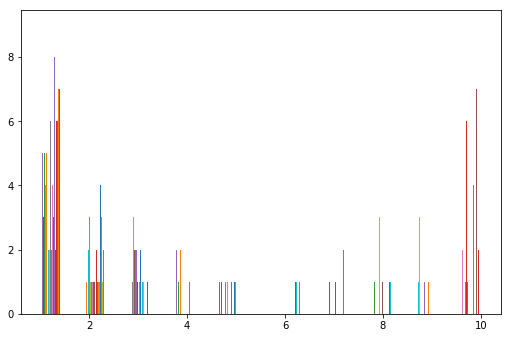

In [19]:
#Draw histograms for columns A2-A10
bcw_subset = bcw_clean[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]
plt.hist(bcw_subset, bins=20)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

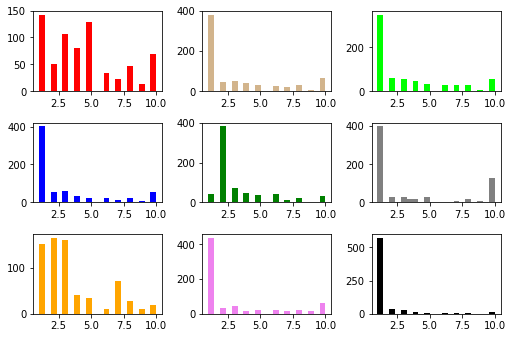

In [20]:
#Draw histograms for columns A2-A10 - histograms as subplots
fig, axes = plt.subplots(nrows=3, ncols=3)
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()

ax0.hist(bcw_clean['A2'], histtype='bar', color='red', bins=20)

ax1.hist(bcw_clean['A3'], histtype='bar',color='tan', bins=20)

ax2.hist(bcw_clean['A4'], histtype='bar',color='lime',bins=20)

ax3.hist(bcw_clean['A5'], histtype='bar',color='blue',bins=20)

ax4.hist(bcw_clean['A6'], histtype='bar',color='green',bins=20)

ax5.hist(bcw_clean['A7'], histtype='bar',color='gray',bins=20)

ax6.hist(bcw_clean['A8'], histtype='bar',color='orange',bins=20)

ax7.hist(bcw_clean['A9'], histtype='bar',color='violet',bins=20)

ax8.hist(bcw_clean['A10'], histtype='bar',color='black',bins=20)

fig.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

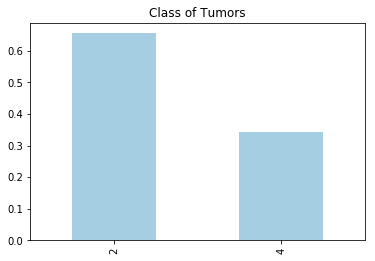

In [21]:
#Draw a bar plot for CLASS - you can use groupby to see counts of benign and malignant values or you can count 
#values directly using pd.value_counts() function and apply it to plot.bar() function.
bcw_clean['CLASS'].value_counts('CLASS').plot(kind = "bar", title="Class of Tumors", colormap='Paired')

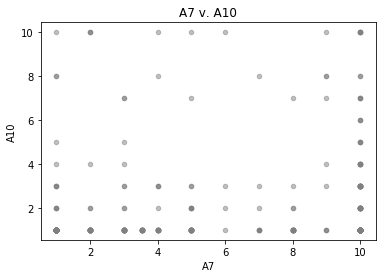

In [22]:
#Draw a scatterplot of any two columns. 
bcw_clean.plot.scatter(x='A7',y='A10', c='gray', alpha = 0.5, title="A7 v. A10")

#Summarize by reporting which values might need standardization in the future (too much variation) and any other observations that you may discover as a Data Scientist.

We found a number of areas that may benefit from additional standardization in the future. The strongest case was A10 - where 99% of benign tumors rated between 1 and 2, and 79% of malignant tumors rated 1-3. This overlap would make it difficult to find any correlation in the data, and indicates that additional guidelines on rating may allow better analysis.  

Some additional observations include: Column A2 seems distributed from range 1-4 at 77% for benign and for malignant 87% is between 5-10.  A3 is similar with 83% of benign tumors at a 1 rating, and 71% of the malignant at 5-10.  Columns A5 and A6 have the largest distribution of scores from 1-10 and may benenfit from more standardization.    

Observations that may be discovered as a Data Scientist:

Point 1:
    Malignancy is generally distributed as a whole
    Mitoses tumors are concentrated between values 1-3
    Individual splits in the image

Point 2:
    We should be able to find two clusters based on the columns as features
    
    

# Part II

# Use KMeans algorithm

In [23]:
model = KMeans(n_clusters=4)
model.fit(bcw_subset)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
labels = model.predict(bcw_subset)

In [25]:
print(labels)

[1 3 1 0 1 2 1 1 1 1 1 1 1 1 2 0 1 1 3 1 3 0 1 0 1 3 1 1 1 1 1 1 0 1 1 1 0
 1 3 3 0 0 2 0 0 1 3 1 1 0 0 1 0 2 3 0 0 0 3 0 0 1 0 0 1 0 1 3 2 1 1 0 1 3
 0 1 1 1 1 1 1 1 1 1 2 0 3 2 1 1 1 1 1 1 1 1 1 1 0 2 0 1 1 1 2 1 3 2 1 3 1
 3 3 2 1 1 1 2 1 1 1 1 2 3 2 1 3 1 3 1 1 1 2 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1
 1 2 1 3 0 1 1 3 1 1 1 2 3 1 1 1 1 1 2 0 1 1 1 1 1 2 3 2 1 0 1 3 1 1 1 2 3
 1 2 2 2 1 2 2 1 1 1 1 3 1 1 1 2 3 1 1 1 2 0 1 1 2 2 1 2 2 0 1 1 0 1 1 2 1
 3 3 1 3 0 1 2 3 2 0 3 1 1 2 0 2 3 1 1 1 1 1 1 2 3 1 1 1 3 3 3 1 1 3 3 2 2
 3 0 1 3 3 0 1 3 1 1 1 1 1 1 1 3 1 1 3 3 3 2 2 1 0 2 1 1 0 3 1 3 0 1 1 3 0
 1 2 1 3 3 1 1 0 1 1 1 0 1 1 0 3 2 1 3 3 1 1 3 1 1 3 1 0 3 3 1 1 3 3 1 3 1
 3 3 1 1 1 2 1 1 1 0 3 1 1 0 2 1 1 1 2 0 3 2 3 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0
 1 3 1 3 1 1 1 1 2 1 1 1 2 1 0 1 1 1 1 1 1 3 3 0 1 1 1 3 1 1 1 1 1 1 1 1 2
 1 1 1 2 1 1 3 0 1 1 1 1 1 1 1 0 3 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1
 2 0 1 1 3 1 2 3 1 1 1 1 

In [26]:
centroids = model.cluster_centers_
print(centroids)

[[7.44285714 6.98571429 6.62857143 4.24285714 5.47142857 3.38826605
  5.41428571 6.87142857 2.32857143]
 [2.9532294  1.24721604 1.36971047 1.29621381 2.04454343 1.35531374
  2.05790646 1.20267261 1.077951  ]
 [6.7721519  8.36708861 8.40506329 7.82278481 6.75949367 9.20253165
  7.37974684 7.79746835 3.79746835]
 [7.27956989 4.87096774 5.04301075 4.89247312 4.12903226 9.37634409
  5.24731183 3.8172043  1.65591398]]


# Find optimal number of clusters

In [27]:
# make a range
ks = range(1, 15)

#create an empty list for inertias values
inertias = [] 

# do a for loop
for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(bcw_subset)    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

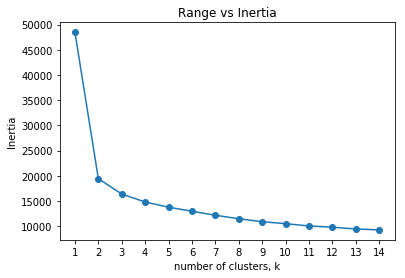

In [28]:
# Plot Range vs Inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()

In [29]:
#specify the optimal number of clusters based on the inertia plot

### Based on the plot, we should choose the number where there is an obvious "elbow" for the optimal number of clusters.  In this plot 2 would be the optimal number of clusters.

# Revise data variation

In [30]:
#apply standard deviation function for columns A2-A10
bcw_subset.std(axis=0)

A2     2.815861
A3     3.041328
A4     2.959886
A5     2.866552
A6     2.199852
A7     3.595445
A8     2.442345
A9     3.066298
A10    1.723129
dtype: float64

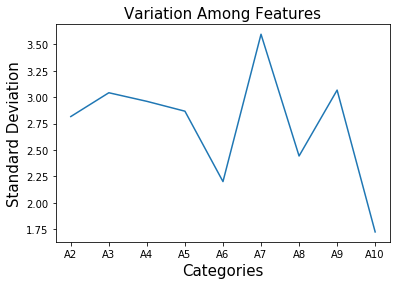

In [31]:
#plot standard deviation values - select a graphic that could display all nine values [do not use histogram],
#add title, legend, ylabel, xlabel.

x = [0,1,2,3,4,5,6,7,8]
Labels = ['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']
y = bcw_subset.std(axis=0)
index = np.arange(len(Labels))
plt.plot(x, y)
plt.xlabel('Categories', fontsize=15)
plt.ylabel('Standard Deviation', fontsize=15)
plt.xticks(index, Labels, fontsize=10)
plt.title('Variation Among Features', fontsize=15)
plt.show()

#describe which features have a lot of data variation

### Features A7 and A9 have the most variation

# Implement normalization

In [32]:
scaler = StandardScaler()
# Create KMeans instance: kmeans
#use the n_cluster based on the optimal number you have identified from Inertia
model = KMeans(n_clusters=2) 
# Create pipeline: pipeline
pipeline = make_pipeline(scaler,model)
pipeline.fit(bcw_subset)
labels = pipeline.predict(bcw_subset)
print(labels)

[1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0
 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1
 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0
 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1
 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 1 1 1 1 

In [33]:
#find centroids and print them
centroids = model.cluster_centers_
print(centroids)

[[ 0.98829075  1.20778761  1.19655467  1.03136788  1.01259241  1.15177897
   1.08975758  1.06114154  0.60574472]
 [-0.49629383 -0.60651943 -0.60087854 -0.51792605 -0.50849749 -0.57839335
  -0.54724783 -0.5328776  -0.30418919]]


# Phase III 

### Cluster

In [34]:
#Cluster - Change iteration to 500 and initial centroids to 20
#Run Kmeans with n_clusters = 2
model = KMeans(n_clusters=2, n_init=20, max_iter=500)

model.fit(bcw_subset)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
#Save predicted clusters into a variable labels

labels = model.predict(bcw_subset)

In [36]:
print(labels)

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 0 0 1 0 1 0 0 0 0 0 

### DataFrame

In [37]:
#Create a new column in your dataframe and add Kmeans labels.

bcw_subset['labels'] = labels

In [38]:
print(bcw_subset.head(n=3))

   A2  A3  A4  A5  A6    A7  A8  A9  A10  labels
0   5   1   1   1   2   1.0   3   1    1       0
1   5   4   4   5   7  10.0   3   2    1       1
2   3   1   1   1   2   2.0   3   1    1       0


In [39]:
#Change labels values so that 0 becomes 2 and 1 becomes 4.
bcw_subset['labels'] = bcw_subset['labels'].replace(0, 2)
bcw_subset['labels'] = bcw_subset['labels'].replace(1, 4)

In [41]:
#Print the first 15 records from your dataframe
print(bcw_subset.head(n=15))

    A2  A3  A4  A5  A6    A7  A8  A9  A10  labels
0    5   1   1   1   2   1.0   3   1    1       2
1    5   4   4   5   7  10.0   3   2    1       4
2    3   1   1   1   2   2.0   3   1    1       2
3    6   8   8   1   3   4.0   3   7    1       4
4    4   1   1   3   2   1.0   3   1    1       2
5    8  10  10   8   7  10.0   9   7    1       4
6    1   1   1   1   2  10.0   3   1    1       2
7    2   1   2   1   2   1.0   3   1    1       2
8    2   1   1   1   2   1.0   1   1    5       2
9    4   2   1   1   2   1.0   2   1    1       2
10   1   1   1   1   1   1.0   3   1    1       2
11   2   1   1   1   2   1.0   2   1    1       2
12   5   3   3   3   2   3.0   4   4    1       2
13   1   1   1   1   2   3.0   3   1    1       2
14   8   7   5  10   7   9.0   5   5    4       4


### Error Rate Function

In [ ]:
#Note: 2 - benign cells; 4 - malign cells

### Report

In [ ]:
#your reflection on the final project results (Note - the aim of the final project is NOT to build an optimal model 
#but to practice the workflow using python - so your results may not be the best.)